# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

!pip install citipy

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])       
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | estevan.
City not found...skipping estevan.
Processing Record 1  of Set 1 | daru.
City not found...skipping daru.
Processing Record 2  of Set 1 | grytviken.
City not found...skipping grytviken.
Processing Record 3  of Set 1 | praia da vitoria.
City not found...skipping praia da vitoria.
Processing Record 4  of Set 1 | omdurman.
City not found...skipping omdurman.
Processing Record 5  of Set 1 | bishoftu.
City not found...skipping bishoftu.
Processing Record 6  of Set 1 | adamstown.
City not found...skipping adamstown.
Processing Record 7  of Set 1 | ribeira grande.
City not found...skipping ribeira grande.
Processing Record 8  of Set 1 | bethel.
City not found...skipping bethel.
Processing Record 9  of Set 1 | margaret river.
City not found...skipping margaret river.
Processing Record 10  of Set 1 | sitka.
City not found...skipping sitka.
Processing Record 11  of Set 1 | albany.
City not found...skip

Processing Record 49  of Set 2 | peace river.
City not found...skipping peace river.
Processing Record 0  of Set 3 | hamilton.
City not found...skipping hamilton.
Processing Record 1  of Set 3 | colonia.
City not found...skipping colonia.
Processing Record 2  of Set 3 | west plains.
City not found...skipping west plains.
Processing Record 3  of Set 3 | punta arenas.
City not found...skipping punta arenas.
Processing Record 4  of Set 3 | aasiaat.
City not found...skipping aasiaat.
Processing Record 5  of Set 3 | udachny.
City not found...skipping udachny.
Processing Record 6  of Set 3 | lichuan.
City not found...skipping lichuan.
Processing Record 7  of Set 3 | papao.
City not found...skipping papao.
Processing Record 8  of Set 3 | east london.
City not found...skipping east london.
Processing Record 9  of Set 3 | happy valley-goose bay.
City not found...skipping happy valley-goose bay.
Processing Record 10  of Set 3 | thakhek.
City not found...skipping thakhek.
Processing Record 11  of

Processing Record 1  of Set 5 | maragogi.
City not found...skipping maragogi.
Processing Record 2  of Set 5 | pocito.
City not found...skipping pocito.
Processing Record 3  of Set 5 | miquelon.
City not found...skipping miquelon.
Processing Record 4  of Set 5 | codrington.
City not found...skipping codrington.
Processing Record 5  of Set 5 | sibu.
City not found...skipping sibu.
Processing Record 6  of Set 5 | angra do heroismo.
City not found...skipping angra do heroismo.
Processing Record 7  of Set 5 | aljezur.
City not found...skipping aljezur.
Processing Record 8  of Set 5 | arraial do cabo.
City not found...skipping arraial do cabo.
Processing Record 9  of Set 5 | malanje.
City not found...skipping malanje.
Processing Record 10  of Set 5 | eastham.
City not found...skipping eastham.
Processing Record 11  of Set 5 | howard springs.
City not found...skipping howard springs.
Processing Record 12  of Set 5 | pantai remis.
City not found...skipping pantai remis.
Processing Record 13  o

Processing Record 4  of Set 7 | shahin dezh.
City not found...skipping shahin dezh.
Processing Record 5  of Set 7 | bandrele.
City not found...skipping bandrele.


ReadTimeout: HTTPConnectionPool(host='api.openweathermap.org', port=80): Read timed out. (read timeout=None)

In [19]:
# Data Count
weather_df.sort_values(by='City', ascending=True)

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph),City_ID
271,'ohonua,,,,,,,,,NaN
104,aasiaat,GL,,68.7098,-52.8699,100,93,24.062,4.32,GL
355,abepura,,,,,,,,,NaN
56,acapulco de juarez,MX,,16.8634,-99.8901,100,88,79.304,1.77,MX
314,acarau,,,,,,,,,NaN
...,...,...,...,...,...,...,...,...,...,...
238,zaigrayevo,RU,,51.8336,108.2703,100,51,38.102,5.63,RU
366,zangguy,,,,,,,,,NaN
352,zelenchukskaya,,,,,,,,,NaN
403,zhetybay,,,,,,,,,NaN


In [9]:
# Display DataFrame
weather_df.head()




,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,estevan,CA,,49.1334,-102.9842,100,79,19.868,4.12
1,daru,PG,,-9.0763,143.2092,100,76,81.122,5.21
2,grytviken,GS,,-54.2811,-36.5092,26,83,27.554,4.95
3,praia da vitoria,PT,,38.7333,-27.0667,40,77,66.722,6.96
4,omdurman,SD,,15.6445,32.4777,94,32,89.33,2.94


In [21]:
# Convert the cities weather data into a Pandas DataFrame

weather_df.count()


City                577
Country             577
Date                577
Latitude            577
Longitude           577
Cloudiness (%)      577
Humidity (%)        577
Max Temp (F)        577
Wind Speed (mph)    577
City_ID             291
dtype: int64

In [22]:
# Display sample data
weather_df

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph),City_ID
0,estevan,CA,,49.1334,-102.9842,100,79,20.012,4.12,CA
1,daru,PG,,-9.0763,143.2092,100,80,80.276,5.29,PG
2,grytviken,GS,,-54.2811,-36.5092,33,84,26.402,4.53,GS
3,praia da vitoria,PT,,38.7333,-27.0667,40,77,66.722,6.89,PT
4,omdurman,SD,,15.6445,32.4777,89,31,90.698,2.74,SD
...,...,...,...,...,...,...,...,...,...,...
572,wotje,,,,,,,,,NaN
573,muynoq,,,,,,,,,NaN
574,essaouira,,,,,,,,,NaN
575,batam,,,,,,,,,NaN


In [24]:
# Export the City_Data into a csv
weather_df.to_csv("D:/MSU DATA/Module6_challenge/Starter_Code/Starter_Code/output_data/cities.output.csv", index_label="City_ID")

In [25]:
# Read saved data
weather_df = pd.read_csv("D:/MSU DATA/Module6_challenge/Starter_Code/Starter_Code/output_data/cities.output.csv", index_col="City_ID")

# Display sample data
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph),City_ID.1
City_ID,,,,,,,,,,
0,estevan,CA,NaN,49.1334,-102.9842,100.0,79.0,20.012,4.12,CA
1,daru,PG,NaN,-9.0763,143.2092,100.0,80.0,80.276,5.29,PG
2,grytviken,GS,NaN,-54.2811,-36.5092,33.0,84.0,26.402,4.53,GS
3,praia da vitoria,PT,NaN,38.7333,-27.0667,40.0,77.0,66.722,6.89,PT
4,omdurman,SD,NaN,15.6445,32.4777,89.0,31.0,90.698,2.74,SD


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The plot proves that as we generally move away from the equator, temperature drops


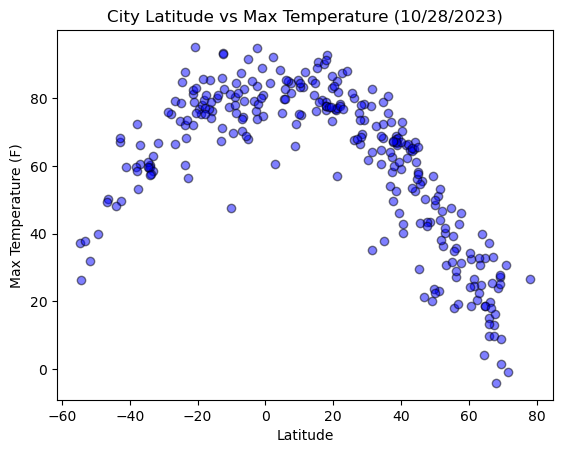

In [26]:
# Build the scatter plots for latitude vs. humidity
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The plot proves that as we generally move away from the equator, temperature drops")

#### Latitude Vs. Cloudiness

The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness


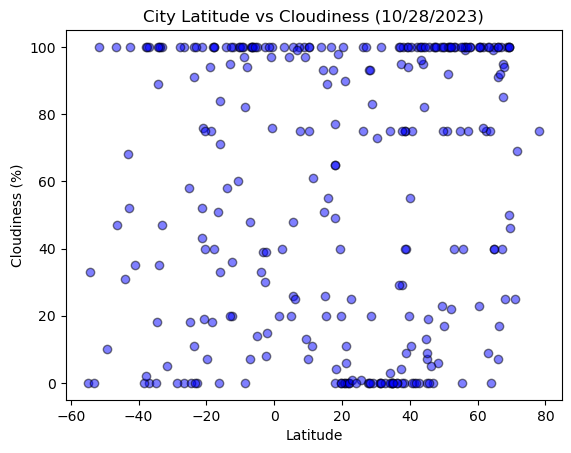

In [27]:
# Build the scatter plots for latitude vs. cloudiness
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness")

#### Latitude vs. Wind Speed Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed


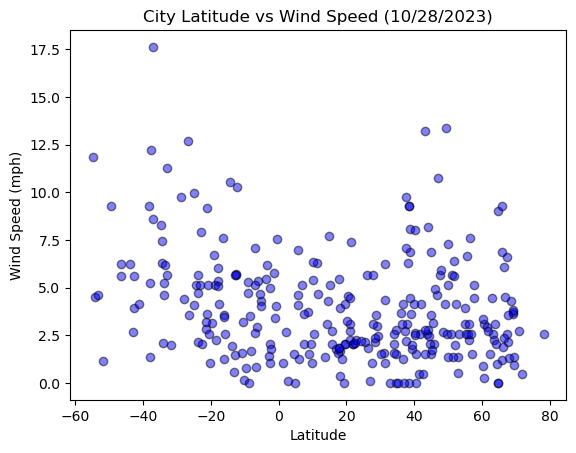

In [28]:
# Build the scatter plots for latitude vs. wind speed
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]


In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df

# Display sample data
#northern_hemi_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph),City_ID.1
City_ID,,,,,,,,,,
0,estevan,CA,NaN,49.1334,-102.9842,100.0,79.0,20.012,4.12,CA
3,praia da vitoria,PT,NaN,38.7333,-27.0667,40.0,77.0,66.722,6.89,PT
4,omdurman,SD,NaN,15.6445,32.4777,89.0,31.0,90.698,2.74,SD
5,bishoftu,ET,NaN,8.7500,38.9833,100.0,77.0,65.804,3.71,ET
7,ribeira grande,PT,NaN,38.5167,-28.7000,75.0,77.0,68.666,9.26,PT
...,...,...,...,...,...,...,...,...,...,...
299,grants,US,NaN,35.1473,-107.8514,0.0,52.0,37.904,0.00,US
300,lukoyanov,RU,NaN,55.0277,44.4786,100.0,98.0,31.730,3.95,RU
301,ouallam,NE,NaN,14.3188,2.0866,93.0,24.0,80.960,3.08,NE


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df

# Display sample data
#southern_hemi_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph),City_ID.1
City_ID,,,,,,,,,,
1,daru,PG,NaN,-9.0763,143.2092,100.0,80.0,80.276,5.29,PG
2,grytviken,GS,NaN,-54.2811,-36.5092,33.0,84.0,26.402,4.53,GS
6,adamstown,PN,NaN,-25.0660,-130.1015,58.0,80.0,73.058,4.09,PN
9,margaret river,AU,NaN,-33.9500,115.0667,35.0,54.0,60.350,5.22,AU
13,bairnsdale,AU,NaN,-37.8333,147.6167,100.0,36.0,72.320,1.34,AU
...,...,...,...,...,...,...,...,...,...,...
294,san antonio de pale,GQ,NaN,-1.4014,5.6325,100.0,78.0,80.042,5.78,GQ
295,bengkulu,ID,NaN,-3.8004,102.2655,33.0,66.0,84.938,5.46,ID
298,sinjai,ID,NaN,-5.1241,120.2530,14.0,36.0,91.400,4.03,ID


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8900235746005478


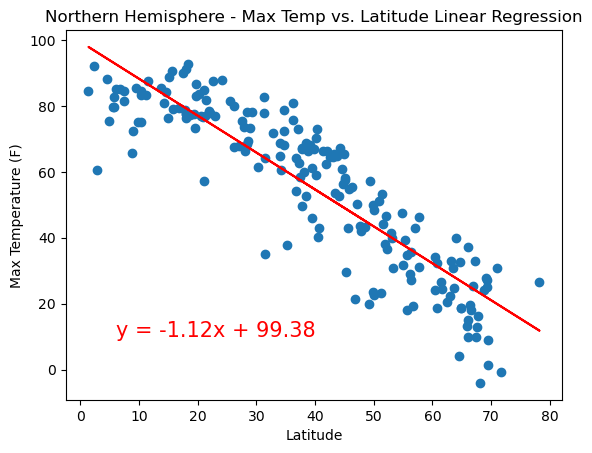

In [34]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.7666796839810867


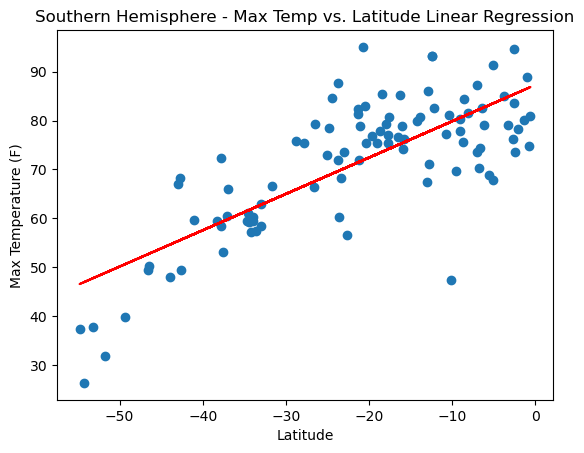

In [37]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.25x + 66.02
The r-squared is: 0.24140924931087773
The regression does not display much of a correlation between the data sets.


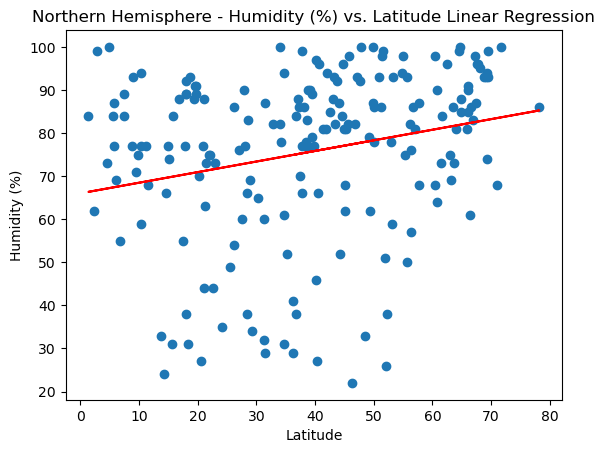

In [38]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

Regression line equation is: y = 0.46x + 38.24
The r-squared is: 0.2133672403123835
The regression does not display much of a correlation between the data sets.


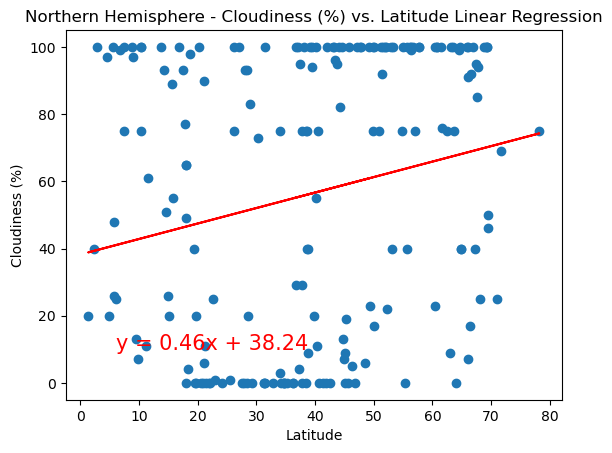

In [40]:
# Southern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.46x + 38.24
The r-squared is: 0.2133672403123835
The regression does not display much of a correlation between the data sets.


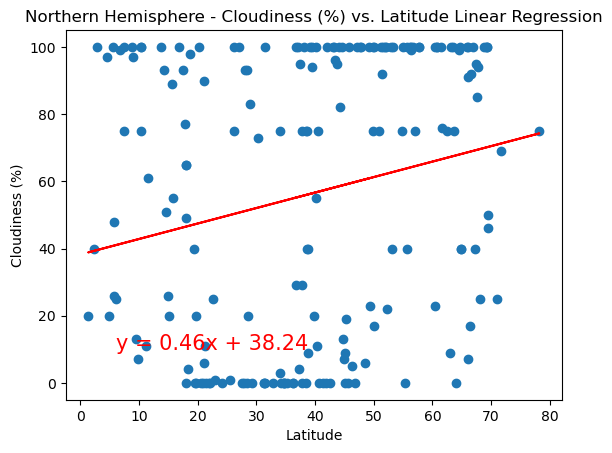

In [41]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = 0.53x + 70.56
The r-squared is: 0.1947602024320981
The regression does not display much of a correlation between the data sets.


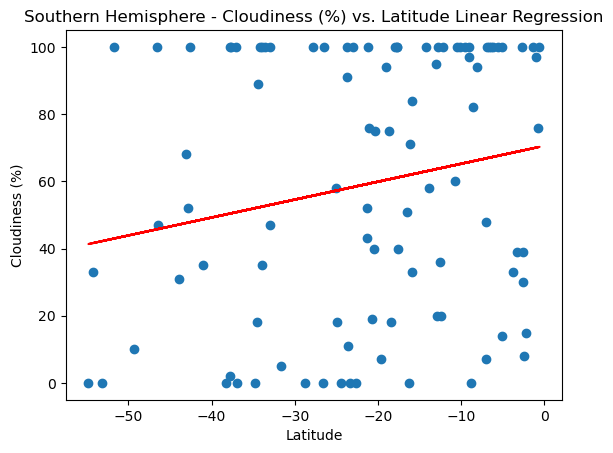

In [42]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.01x + 3.0
The r-squared is: 0.068511146414534
The regression does not display much of a correlation between the data sets.


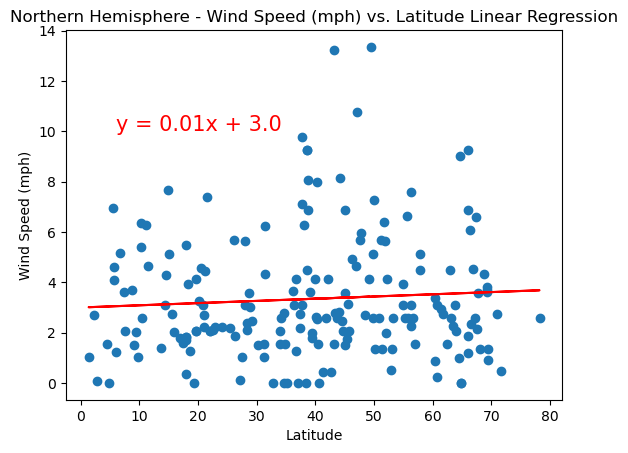

In [43]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = -0.07x + 3.4
The r-squared is: -0.3308410814784597
The regression does not display much of a correlation between the data sets.


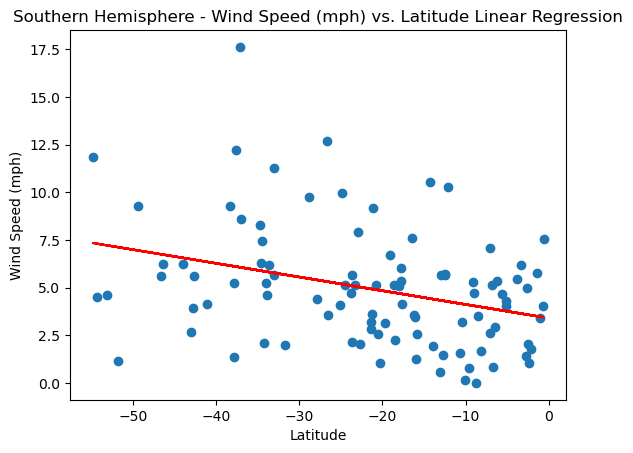

In [44]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE